Binary Classification Example

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from engine.engine import Engine

plt.style.use(plt.style.available[10])

In [11]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate x-coordinates for both classes
x = np.linspace(-1.5, 1, 200)

# Generate y-coordinates for class 0 (lower wave)
y0 = np.cos(4 * x) + np.random.normal(0, 0.2, 200)

# Generate y-coordinates for class 1 (upper wave)
y1 = np.sin(2 * x) + np.random.normal(3, 0.2, 200)

# Combine the coordinates into a single dataset
X = np.vstack((np.column_stack((x, y0)), np.column_stack((x, y1))))

# Create labels for the dataset
y = np.hstack((np.zeros(200), np.ones(200)))

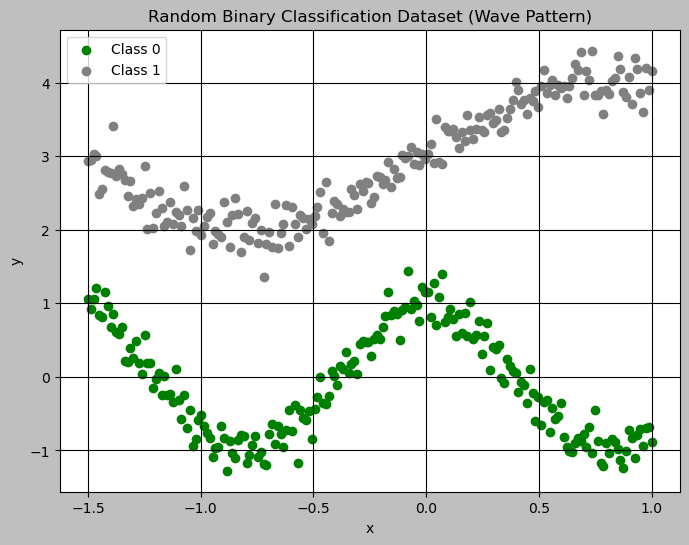

In [12]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:200, 0], X[:200, 1], color='green', label='Class 0')
plt.scatter(X[200:, 0], X[200:, 1], color='gray', label='Class 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Binary Classification Dataset (Wave Pattern)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Define the Sequential Model using Engine class
class SimpleNeuralNetwork:
    def __init__(self):
        # Initialize weights and biases
        self.w1 = Engine(np.random.randn(), requires_grad=True)
        self.w2 = Engine(np.random.randn(), requires_grad=True)
        self.b = Engine(np.random.randn(), requires_grad=True)

    def forward(self, x1, x2):
        # Simple linear combination with sigmoid activation
        z = self.w1 * x1 + self.w2 * x2 + self.b
        return 1 / (1 + np.exp(-z.data))  # Sigmoid activation

In [14]:
# Training the simple neural network
model = SimpleNeuralNetwork()
learning_rate = 0.01
epochs = 100

losses = []
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(X)):
        x1 = Engine(X[i, 0], requires_grad=False)
        x2 = Engine(X[i, 1], requires_grad=False)
        target = y[i]

        # Forward pass
        pred = model.forward(x1, x2)

        # Binary cross-entropy loss
        loss = -(target * np.log(pred) + (1 - target) * np.log(1 - pred))
        total_loss += loss

        # Backward pass
        grad = pred - target  # Derivative of loss w.r.t. prediction
        model.w1.grad = grad * x1.data
        model.w2.grad = grad * x2.data
        model.b.grad = grad

        # Update weights
        model.w1.data -= learning_rate * model.w1.grad
        model.w2.data -= learning_rate * model.w2.grad
        model.b.data -= learning_rate * model.b.grad

    avg_loss = total_loss / len(X)
    losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}")

Epoch 1/100, Loss: 0.5497847647825602
Epoch 2/100, Loss: 0.3390672569447715
Epoch 3/100, Loss: 0.2385547411344211
Epoch 4/100, Loss: 0.18872052123142768
Epoch 5/100, Loss: 0.16015244804893944
Epoch 6/100, Loss: 0.14158167952921732
Epoch 7/100, Loss: 0.12836928436766065
Epoch 8/100, Loss: 0.11835713667540543
Epoch 9/100, Loss: 0.11042139326184514
Epoch 10/100, Loss: 0.10392024120507698
Epoch 11/100, Loss: 0.09845926754179779
Epoch 12/100, Loss: 0.09378155531607557
Epoch 13/100, Loss: 0.08971173497122407
Epoch 14/100, Loss: 0.08612544922709989
Epoch 15/100, Loss: 0.08293169069537505
Epoch 16/100, Loss: 0.08006207486633939
Epoch 17/100, Loss: 0.07746405075640847
Epoch 18/100, Loss: 0.07509644966634746
Epoch 19/100, Loss: 0.0729264768526303
Epoch 20/100, Loss: 0.07092762395282244
Epoch 21/100, Loss: 0.06907818640052131
Epoch 22/100, Loss: 0.06736018872574584
Epoch 23/100, Loss: 0.06575859120691767
Epoch 24/100, Loss: 0.0642606945915606
Epoch 25/100, Loss: 0.06285568683169845
Epoch 26/100, 

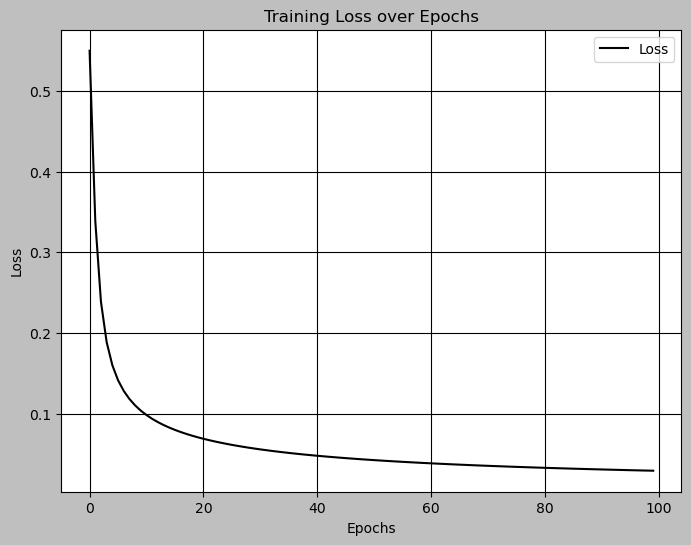

In [15]:
# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

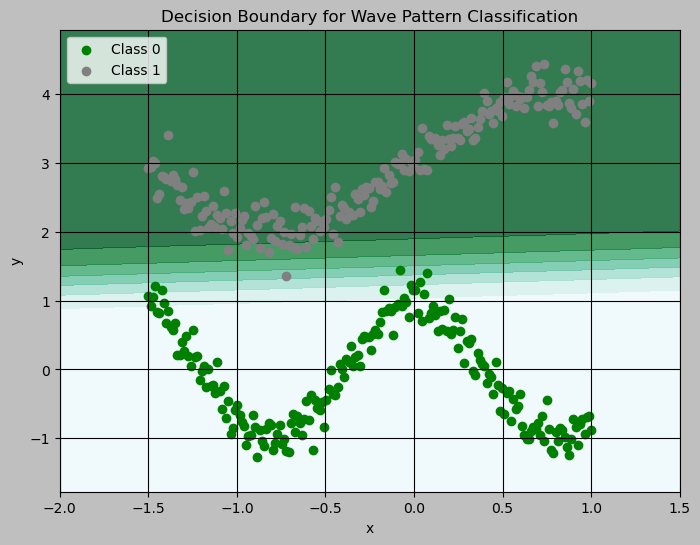

In [16]:
# Decision Boundary Visualization
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = np.array([model.forward(Engine(x, requires_grad=False), Engine(y, requires_grad=False)) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='BuGn')
plt.scatter(X[:200, 0], X[:200, 1], color='green', label='Class 0')
plt.scatter(X[200:, 0], X[200:, 1], color='gray', label='Class 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary for Wave Pattern Classification')
plt.legend()
plt.grid(True)
plt.show()